# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kyleplathe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
print(f"Key type: {type(api_key)}")

Key type: <class 'str'>


In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin", language="en")

# Print total articles
print(f"Total articles about bitcoin: {bitcoin_articles['totalResults']}")

# Show sample article
bitcoin_articles["articles"][0]

Total articles about bitcoin: 9430


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Kris Holt',
 'title': 'New York passes a bill to limit bitcoin mining',
 'description': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of Governor Kathy Hochul, who will sign it into law or veto th…",
 'url': 'https://www.engadget.com/new-york-cryptocurrency-bill-bitcoin-mining-climate-change-161126292.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a8217250-bdfa-11eb-bfc4-2663225cea83',
 'publishedAt': '2022-06-03T16:11:26Z',
 'content': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of… [+2036 chars]"}

In [6]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="ethereum", language="en")

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame Columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df

,date,text,compound,positive,negative,neutral
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
1,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
2,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836
3,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928
5,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833
6,2022-06-02,Customers at Chipotle will now be able to pay ...,0.3182,0.077,0.040,0.883
7,2022-05-05,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.000,0.807
8,2022-05-06,Cryptocurrency mixers are sometimes used to he...,-0.4404,0.202,0.241,0.557
9,2022-05-24,Photo Illustration by Grayson Blackmon / The V...,-0.4767,0.000,0.103,0.897


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame Columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960
2,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954
3,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
4,2022-05-25,"DAVOS, Switzerland, May 25 (Reuters) - Ethereu...",0.0258,0.034,0.000,0.966
5,2022-05-09,Editorial IndependenceWe want to help you make...,0.6908,0.178,0.000,0.822
6,2022-05-09,"40 days ago Bitcoin sold for $47,454. It's pri...",-0.6908,0.000,0.178,0.822
7,2022-05-15,When Nvidia launched its Ampere Lite Hash Rate...,-0.3818,0.069,0.085,0.847
8,2022-05-11,"May 11 (Reuters) - Bitcoin fell 7.23% to $28,7...",-0.3818,0.000,0.077,0.923
9,2022-05-09,May 9 (Reuters) - Bitcoin dropped 7.81% to $31...,-0.3818,0.000,0.077,0.923


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()


,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,-0.098455,0.06175,0.077500,0.860850
std,0.431188,0.06477,0.077527,0.100073
min,-0.859300,0.00000,0.000000,0.557000
25%,-0.411525,0.00000,0.030000,0.837500
50%,-0.199350,0.04900,0.071500,0.881000
75%,0.249275,0.08050,0.099250,0.923000
max,0.750600,0.20200,0.300000,0.964000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.022370,0.050150,0.049350,0.900700
std,0.431256,0.056688,0.052294,0.057349
min,-0.690800,0.000000,0.000000,0.803000
25%,-0.381800,0.000000,0.000000,0.856000
50%,-0.051350,0.040000,0.042500,0.912500
75%,0.365100,0.075250,0.079000,0.954250
max,0.690800,0.178000,0.178000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had a mean positive score of 0.053650, while ethereum had a mean positive score of 0.04035.

Q: Which coin had the highest compound score?

A: Bitcoin also has the highest compound score of 0.75.

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score of 0.202

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'the'}

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyleplathe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    sw_addon = {'the'}
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
bitcoin_df['word tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,word tokens
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[new, york, lawmaker, passed, bill, would, tem..."
1,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
2,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836,"[image, caption, president, faustinarchange, t..."
3,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960,"[reportedly, pay, burrito, taco, bitcoin, digi..."
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."


In [15]:
# Create a new tokens column for Ethereum
ethereum_df['word tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,word tokens
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[meta, ha, revealed, nfts, work, instagram, us..."
1,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960,"[gamestop, ha, officially, thrown, headlong, w..."
2,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954,"[gamestop, going, allin, crypto, video, game, ..."
3,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[new, york, lawmaker, passed, bill, would, tem..."
4,2022-05-25,"DAVOS, Switzerland, May 25 (Reuters) - Ethereu...",0.0258,0.034,0.000,0.966,"[davos, switzerland, may, reuters, ethereums, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2

big_string_1 = bitcoin_df['text'].str.cat()
processed_1 = tokenizer(big_string_1)
bigrams_1 = Counter(ngrams(processed_1, n=2))

In [18]:
# Generate the Ethereum N-grams where N=2
big_string_2 = ethereum_df['text'].str.cat()
processed_2 = tokenizer(big_string_2)
bigrams_2 = Counter(ngrams(processed_2, n=2))

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
top_10_btc = token_count(bigrams_1, 10)
top_10_btc

[(('reuters', 'bitcoin'), 3),
 (('charsmay', 'reuters'), 3),
 (('new', 'blockchain'), 3),
 (('seth', 'greens'), 3),
 (('pay', 'burrito'), 2),
 (('losing', 'previous'), 2),
 (('previous', 'closebitcoin'), 2),
 (('closebitcoin', 'world'), 2),
 (('world', 'biggest'), 2),
 (('biggest', 'bestknown'), 2)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
top_10_eth = token_count(bigrams_2, 10)
top_10_eth

[(('bill', 'would'), 2),
 (('mining', 'operation'), 2),
 (('lite', 'hash'), 2),
 (('hash', 'rate'), 2),
 (('graphic', 'card'), 2),
 (('charsmay', 'reuters'), 2),
 (('reuters', 'bitcoin'), 2),
 (('losing', 'previous'), 2),
 (('previous', 'closebitcoin'), 2),
 (('closebitcoin', 'world'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

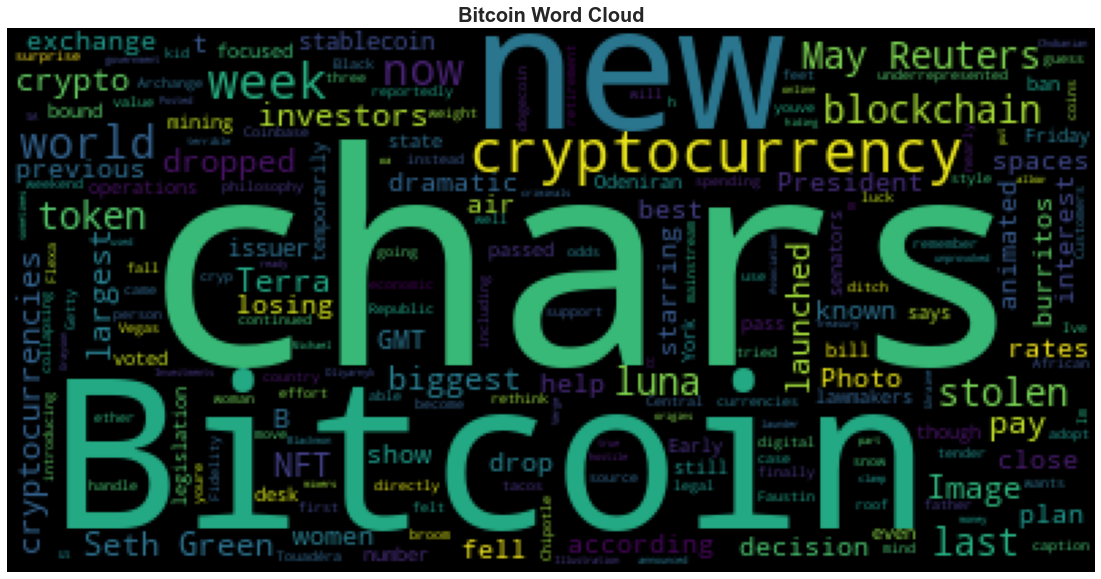

In [23]:
# Generate the Bitcoin word cloud

wc_btc = WordCloud().generate(big_string_1)
plt.imshow(wc_btc)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

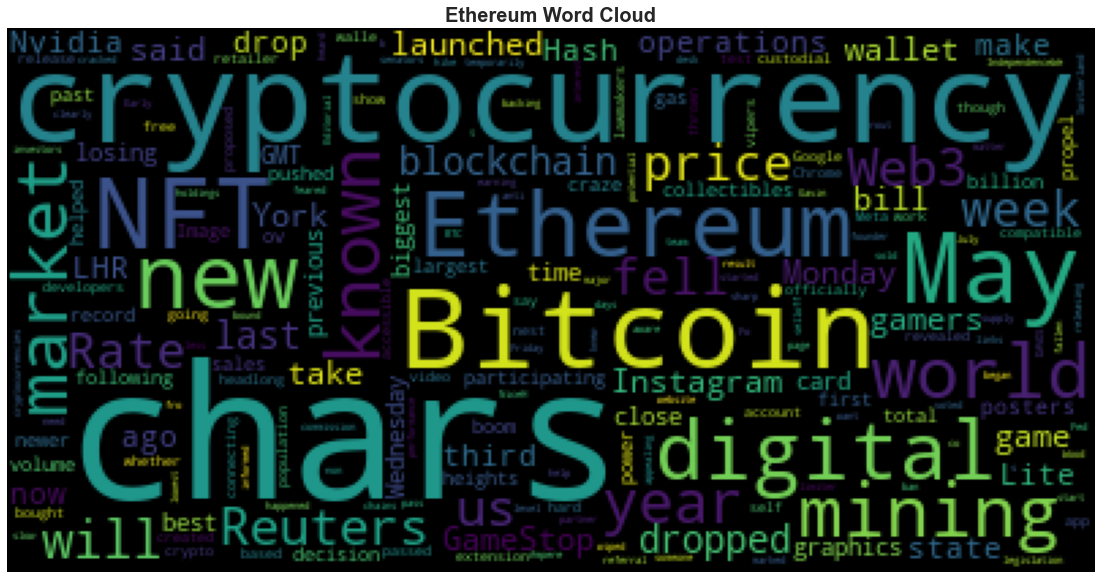

In [24]:
# Generate the Ethereum word cloud

wc_eth = WordCloud().generate(big_string_2)
plt.imshow(wc_eth)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [37]:
# Concatenate all of the Bitcoin text together
bitcoin_text = (big_string_1)

In [41]:
# Run the NER processor on all of the text
doc_1 = nlp(bitcoin_text)

# Add a title to the document
doc_1.user_data["NER Visualization - Bitcoin"] = "NER Visualization - Bitcoin"


In [42]:
# Render the visualization
displacy.render(doc_1, style='ent')

In [43]:
# List all Entities
for ent in doc_1.ents:
    print(ent.text)

New York
Friday
36-27
Odeniran
Faustin-Archange Touadéra
The Central African Republic's
Bitcoin
first
Getty Images

the weekend
34,000
27,630
Coinbase
nearly three feet
Chipotle
Last week
Fidelity Investments
the US Treasury
Grayson Blackmon
Oliyarnyk / CC-BY-SA-4.0
Michael Chobanian
the Blockchain Association of Ukraine
Bitcoin
Gucci handbag
week
Kristy Kilburn
May 11
Reuters
7.23%
28,758.29
GMT
Wednesday
2,241.68
40.4%
+361 chars]May 9
Reuters
7.81%
31,333.41
GMT
Monday
2,655.98
35%
last July
33,000
the week
last week
Fed
Mexican
North London
a few weeks ago
+2779 chars]May
24
Reuters
its ninth week
Reuters
+4315 chars]Terra
Seth Green's
NFT
today
Seth Green's
NFT
two
Seth Green's
Nike


---

### Ethereum NER

In [44]:
# Concatenate all of the Ethereum text together
ethereum_text = (big_string_2)

In [47]:
# Run the NER processor on all of the text
doc_2 = nlp(ethereum_text)

# Add a title to the document
doc_2.user_data["NER Visualization - Ethereum"] = "NER Visualization - Ethereum"

In [48]:
# Render the visualization
displacy.render(doc_2, style='ent')

In [49]:
# List all Entities
for ent in doc_2.ents:
    print(ent.text)

Meta
Instagram
US
Instagram
chars]GameStop
web3
Ethereum
Monday
Google Chrome
chars]New York
Friday
36-27
Switzerland
May 25
Reuters
Gavin Wood
IndependenceWe
chars]40 days ago
47,454
34,007
28%.About a third
this week
Nvidia
Ampere Lite Hash Rate
LHR
Ethereum
chars]May 11
Reuters
7.23%
28,758.29
GMT
Wednesday
2,241.68
40.4%
+361 chars]May 9
Reuters
7.81%
31,333.41
GMT
Monday
2,655.98
35%
8
Nvidia
LHR
last year 
last July
33,000
the week
last week
Fed
the past few years
NFT
$29 billion
several years ago
Getty Images

the weekend
34,000
27,630
Coinbase
+2164 chars]Solana
third
10%
Wednesday
the past few years
NFT
$29 billion
6
New York's
Ukraine
Ethereum
Johnny
YouTuber
first


---